# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


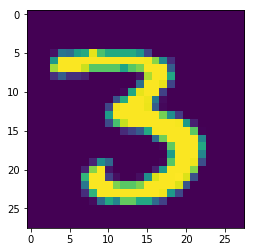

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[12])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
from keras.layers import Activation, BatchNormalization, Dropout
model = Sequential()

# After 1x1 BN added + mp rm1 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm1

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm2

model.add(Convolution2D(20, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))
model.add(BatchNormalization()) # **
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6))
model.add(BatchNormalization()) # *1
# model.add(Dropout(0.1)) # exp dropout
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 26, 8)         136       
_________________________________________________________________
batch_normalization_35 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_32 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 16)        1168      
__________

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.3)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
             metrics=['accuracy'])

### lr 0.1 + momentum + nestrov True

In [11]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 29s 488us/step - loss: 0.2364 - acc: 0.9281 - val_loss: 0.0663 - val_acc: 0.9798
Epoch 2/50
60000/60000 [==============================] - 26s 434us/step - loss: 0.1126 - acc: 0.9659 - val_loss: 0.0473 - val_acc: 0.9840
Epoch 3/50
60000/60000 [==============================] - 26s 438us/step - loss: 0.0931 - acc: 0.9718 - val_loss: 0.0351 - val_acc: 0.9889
Epoch 4/50
60000/60000 [==============================] - 25s 419us/step - loss: 0.0816 - acc: 0.9756 - val_loss: 0.0414 - val_acc: 0.9876
Epoch 5/50
60000/60000 [==============================] - 25s 417us/step - loss: 0.0759 - acc: 0.9773 - val_loss: 0.0301 - val_acc: 0.9907
Epoch 6/50
60000/60000 [==============================] - 26s 437us/step - loss: 0.0719 - acc: 0.9780 - val_loss: 0.0310 - val_acc: 0.9892
Epoch 7/50
60000/60000 [==============================] - 25s 416us/step - loss: 0.0670 - acc: 0.9800 - val_loss: 0.

### lr 0.1

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 442us/step - loss: 0.2996 - acc: 0.9198 - val_loss: 0.0786 - val_acc: 0.9776
Epoch 2/50
60000/60000 [==============================] - 25s 414us/step - loss: 0.1380 - acc: 0.9614 - val_loss: 0.0486 - val_acc: 0.9857
Epoch 3/50
60000/60000 [==============================] - 26s 429us/step - loss: 0.1093 - acc: 0.9695 - val_loss: 0.0427 - val_acc: 0.9867
Epoch 4/50
60000/60000 [==============================] - 24s 406us/step - loss: 0.0955 - acc: 0.9731 - val_loss: 0.0408 - val_acc: 0.9875
Epoch 5/50
60000/60000 [==============================] - 24s 405us/step - loss: 0.0863 - acc: 0.9755 - val_loss: 0.0348 - val_acc: 0.9904
Epoch 6/50
60000/60000 [==============================] - 25s 409us/step - loss: 0.0788 - acc: 0.9770 - val_loss: 0.0324 - val_acc: 0.9904
Epoch 7/50
60000/60000 [==============================] - 25s 417us/step - loss: 0.0758 - acc: 0.9788 - val_loss: 0.

### lr 0.2

In [18]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 446us/step - loss: 0.2493 - acc: 0.9310 - val_loss: 0.0602 - val_acc: 0.9817
Epoch 2/50
60000/60000 [==============================] - 25s 420us/step - loss: 0.1258 - acc: 0.9636 - val_loss: 0.0498 - val_acc: 0.9853
Epoch 3/50
60000/60000 [==============================] - 24s 404us/step - loss: 0.1036 - acc: 0.9694 - val_loss: 0.0389 - val_acc: 0.9875
Epoch 4/50
60000/60000 [==============================] - 24s 406us/step - loss: 0.0901 - acc: 0.9733 - val_loss: 0.0357 - val_acc: 0.9892
Epoch 5/50
60000/60000 [==============================] - 26s 431us/step - loss: 0.0828 - acc: 0.9757 - val_loss: 0.0315 - val_acc: 0.9892
Epoch 6/50
60000/60000 [==============================] - 24s 407us/step - loss: 0.0754 - acc: 0.9779 - val_loss: 0.0380 - val_acc: 0.9870
Epoch 7/50
60000/60000 [==============================] - 25s 417us/step - loss: 0.0720 - acc: 0.9786 - val_loss: 0.

### lr 0.3

In [21]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 451us/step - loss: 0.2306 - acc: 0.9330 - val_loss: 0.0581 - val_acc: 0.9829
Epoch 2/50
60000/60000 [==============================] - 24s 406us/step - loss: 0.1149 - acc: 0.9657 - val_loss: 0.0517 - val_acc: 0.9837
Epoch 3/50
60000/60000 [==============================] - 26s 428us/step - loss: 0.0926 - acc: 0.9725 - val_loss: 0.0481 - val_acc: 0.9862
Epoch 4/50
60000/60000 [==============================] - 25s 419us/step - loss: 0.0823 - acc: 0.9752 - val_loss: 0.0317 - val_acc: 0.9902
Epoch 5/50
60000/60000 [==============================] - 24s 407us/step - loss: 0.0745 - acc: 0.9777 - val_loss: 0.0367 - val_acc: 0.9884
Epoch 6/50
60000/60000 [==============================] - 25s 424us/step - loss: 0.0712 - acc: 0.9787 - val_loss: 0.0275 - val_acc: 0.9906
Epoch 7/50
60000/60000 [==============================] - 26s 436us/step - loss: 0.0663 - acc: 0.9801 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [23]:
print(score)

[0.018212530983402395, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0593689e-17 6.3046323e-17 8.9005447e-13 1.8406407e-10 8.0754371e-19
  8.0671096e-15 1.1510667e-24 1.0000000e+00 2.1262439e-10 2.7205176e-11]
 [2.5421015e-15 5.1460576e-12 1.0000000e+00 1.7606363e-12 6.3726551e-23
  3.3248325e-16 4.4326671e-09 1.8222993e-27 1.8873889e-12 3.6800765e-21]
 [3.7568029e-08 9.9987435e-01 6.9531761e-06 6.3134886e-10 9.9738187e-05
  5.2485571e-08 1.0483473e-07 1.0138228e-06 1.7757657e-05 1.9014761e-10]
 [1.0000000e+00 2.2739057e-15 6.6718070e-10 5.6225624e-15 4.5025926e-16
  2.7407175e-13 1.3530634e-09 3.9892802e-13 5.8574483e-14 4.0855683e-12]
 [1.0115652e-12 6.9521903e-14 1.3467061e-13 1.9833676e-13 9.9999976e-01
  4.2785103e-16 1.6022580e-12 5.5436229e-11 6.7551126e-10 2.2112354e-07]
 [2.3979660e-10 9.9982810e-01 3.5553690e-08 3.5910691e-11 1.0332796e-05
  1.4169725e-10 2.0029900e-11 1.5314015e-04 8.3647601e-06 3.8377021e-10]
 [1.4182455e-19 9.8074493e-11 5.7774190e-09 2.3251079e-13 9.9966061e-01
  6.0978769e-09 2.3871165e-16 2.2344653e-09 3.3876873e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

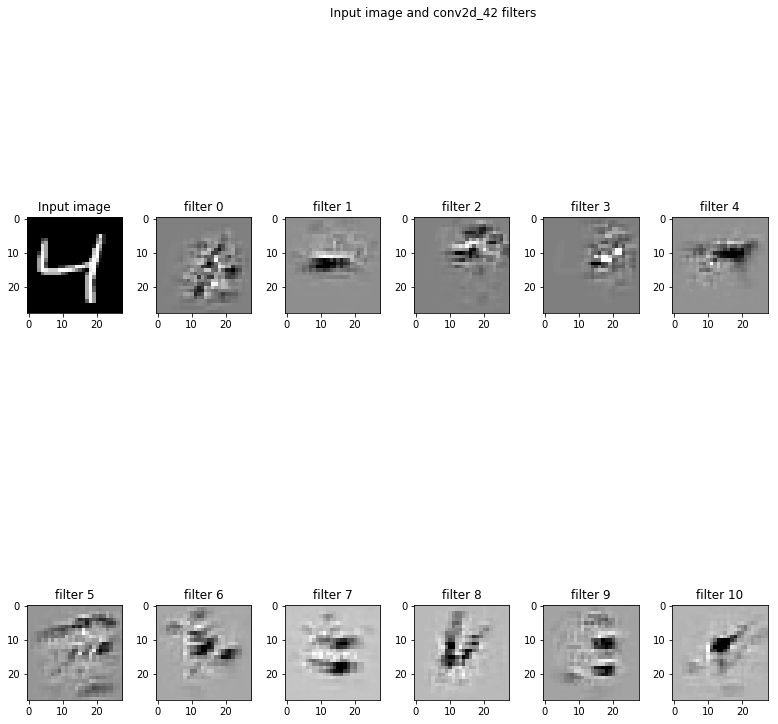

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_42'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Results

---

#### 0.1 + momentum + nesterov + SGD
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9885 </br>
Val Acc - 0.9937 </br>
HIghest Val Acc - 0.9946 in 45th epoc</br>

#### 0.1 + SGD
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9886 </br>
Val Acc - 0.9932 </br>
HIghest Val Acc - 0.9944 in 44th epoc</br>

#### 0.2 + SGD
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9880 </br>
Val Acc - 0.9937 </br>
HIghest Val Acc - 0.9947 in 43rd epoc</br>

#### 0.3 + SGD
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9883 </br>
Val Acc - 0.9942 </br>
HIghest Val Acc - 0.9950 in 45th epoc</br>



#### Obs. 
lr 0.3 achieve 0.9950 Val Acc (this is the best my model achieve)